In [ ]:
# ! pip install pandas-profiling==2.7.1

In [ ]:
%matplotlib inline
import math
import pandas as pd
import statistics
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
from numpy import exp
import plotly.graph_objects as go
!pip install fuzzywuzzy
from scipy.special import softmax
!pip install python-Levenshtein
from fuzzywuzzy import fuzz
from random import uniform,seed
from scipy.stats import truncnorm
import heapq
import time
import random

     |████████████████████████████████| 51kB 2.0MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149802 sha256=c9f8e9ae21ebc7b78b80eaf1a445a3d0633ab58d64c92e7116108b5882f05586
  Stored in directory: /root/.cache/pip/wheels/b3/26/73/4b48503bac73f01cf18e52cd250947049a7f339e940c5df8fc
Successfully built python-Levenshtein


In [ ]:
edge_df = pd.read_csv("https://bitbucket.org/hari_narayanan_123/facebook_link_graph/raw/4a0e18b20fdcd7e421c4e7e2591118591b08a422/musae_facebook_edges.csv")
target_df = pd.read_csv("https://bitbucket.org/hari_narayanan_123/facebook_link_graph/raw/4a0e18b20fdcd7e421c4e7e2591118591b08a422/musae_facebook_target.csv")
edge_df.head()
target_df.head()

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician


In [ ]:
G = nx.from_pandas_edgelist(edge_df, source='id_1', target='id_2') 
# nx.draw(G,node_size=1)

In [ ]:
tot_degree = node_count = 0
for node in G.nodes():
  tot_degree = tot_degree+ G.degree(node)
  node_count = node_count+1
avg_degree = tot_degree/node_count
avg_degree

15.220471740097908

In [ ]:
nx.average_neighbor_degree(G)

{0: 51.0,
 18427: 6.470588235294118,
 1: 140.52941176470588,
 21708: 73.3076923076923,
 22208: 84.32682926829268,
 22171: 75.77575757575758,
 6829: 147.37037037037038,
 16590: 113.36781609195403,
 20135: 83.98571428571428,
 8894: 121.1923076923077,
 15785: 71.93877551020408,
 10281: 187.46153846153845,
 22265: 97.570796460177,
 7136: 130.2,
 22405: 146.390243902439,
 10379: 70.92307692307692,
 13737: 97.51612903225806,
 8533: 139.5,
 14344: 139.96,
 2812: 135.88888888888889,
 5755: 110.92647058823529,
 16260: 141.3846153846154,
 15026: 148.97619047619048,
 17370: 67.69430051813471,
 17460: 78.54545454545455,
 8049: 85.35751295336787,
 5307: 78.5327868852459,
 4987: 76.88888888888889,
 18304: 23.36,
 12305: 58.26865671641791,
 19743: 68.26253687315634,
 20024: 99.21875,
 21729: 68.96965098634294,
 10554: 107.01785714285714,
 11557: 66.83333333333333,
 5228: 135.015625,
 9934: 85.0,
 2: 15.5,
 9048: 13.357142857142858,
 6353: 14.26086956521739,
 2629: 15.5,
 11537: 11.454545454545455,
 1

Degree Centrality based Algo --> Getting top 5 nodes based on their Degree

In [ ]:
start_time = time.time()
li = [()];
heapq.heapify(li)
for node in G.nodes():
  deg = G.degree[node];
  heapq.heappush(li,(deg,node));
  if len(li) > 5:
    heapq.heappop(li)
li.sort(key=lambda x:x[0],reverse=True)
end_time = (time.time() - start_time);

In [ ]:
print(list(li))
print("Time taken is ",end_time)
for i,j in li:
  print("Deg "+ str(i), "Node is "+ str(j));

[(709, 16895), (678, 19743), (659, 21729), (650, 14497), (504, 1387)]
Time taken is  0.07206416130065918
Deg 709 Node is 16895
Deg 678 Node is 19743
Deg 659 Node is 21729
Deg 650 Node is 14497
Deg 504 Node is 1387


Single Degree Discount Algorithm


In [ ]:
start_time = time.time()
G_sing_deg_dis = G.copy();
li_si_deg_dis = [];
k = 20;
for i in range(k):
  max_deg = -1;
  for node in G_sing_deg_dis.nodes():
    deg = G_sing_deg_dis.degree[node];
    if deg > max_deg:
      rem_node = node;
      max_deg = deg;
  li_si_deg_dis.append((rem_node,max_deg));
  G_sing_deg_dis.remove_node(rem_node);
end_time = (time.time() - start_time);
print("Time taken is ",end_time)

Time taken is  1.7113990783691406


In [ ]:
li_si_deg_dis
S_sin_deg_discount = []
for node,deg in li_si_deg_dis:
  S_sin_deg_discount.append(node)

Degree Discount Algorithm


In [ ]:
start_time = time.time()
G_degree_discount = G.copy();
V = G_degree_discount.number_of_nodes();
ddv = [None] * V;
tv = [0] * V;
p = 0.01;
k = 20;
S_deg_discount = [];
for node in G_degree_discount.nodes():
  degree = G_degree_discount.degree[node];
  ddv[node] = degree;
for i in range(k):
  max_deg = -1;
  u = -1;
  for node in G_degree_discount.nodes():
    deg = ddv[node];
    if deg > max_deg and node not in S_deg_discount:
      u = node;
      max_deg = deg;
  S_deg_discount.append(u);
  neighbour_list = list(G_degree_discount.neighbors(u));
  for v in neighbour_list:
    if v in S_deg_discount:
      continue
    tv[v] = tv[v] + 1;
    dv = G_degree_discount.degree[v];
    ddv[v] = dv - 2*tv[v] - (dv-tv[v])*tv[v]*p;
end_time = (time.time() - start_time);
print("Time taken is ",end_time)

Time taken is  1.2351319789886475


In [ ]:
for node in S_deg_discount:
  print("Node is " + str(node),"Discounted Degree is "+ str(ddv[node]))

Node is 16895 Discounted Degree is 709
Node is 19743 Discounted Degree is 669.23
Node is 21729 Discounted Degree is 650.42
Node is 14497 Discounted Degree is 624.59
Node is 1387 Discounted Degree is 476.0
Node is 10379 Discounted Degree is 441.44
Node is 21120 Discounted Degree is 417
Node is 19347 Discounted Degree is 409.48
Node is 2442 Discounted Degree is 389.85
Node is 701 Discounted Degree is 374.21
Node is 15236 Discounted Degree is 346.5
Node is 9319 Discounted Degree is 330.52
Node is 13294 Discounted Degree is 324.71
Node is 8139 Discounted Degree is 323.64
Node is 14650 Discounted Degree is 320.75
Node is 11003 Discounted Degree is 314.2
Node is 10426 Discounted Degree is 303.04
Node is 20415 Discounted Degree is 299.36
Node is 8883 Discounted Degree is 296.9
Node is 11332 Discounted Degree is 296.68


In [ ]:
# AM = nx.adjacency_matrix(G)

In [ ]:
# import operator
# import numpy as np
# import copy
# import time

# def LFA(matrix):
#     rows = matrix.shape[0]
#     n = rows
#     m = matrix.shape[1]
#     Mr = [1 for i in range(max(m,n))]
#     for i_ in range(1, n):
#         i = n - i_
#         for j in range(0, i + 1):
#             Mr[j] = Mr[j] + matrix[j][i] * Mr[i]
#             Mr[i] = (1 - matrix[j][i]) * Mr[i]
#     return Mr

# def IMRank(matrix):
#     start = time.clock()
#     t = 0
#     rows=matrix.shape[0]
#     cols = matrix.shape[1]
#     r0 = [i for i in range(rows)]
#     r = [0 for i in range(cols)]
#     while(True):
#         t = t + 1
#         r = LFA(matrix)
#         r = np.argsort(-np.array(r))
#         if operator.eq(list(r0), list(r)):
#             break
#         r0 = copy.copy(r)
#     #print('运行时间 ： {}'.format(time.clock() - start))
#     print(r)

In [ ]:
# IMRank(AM)

Down below is the code for labelling the nodes with their features.


In [ ]:
nx.set_node_attributes(G, pd.Series(target_df.page_name, index=target_df.id).to_dict(), 'page_name')
nx.set_node_attributes(G, pd.Series(target_df.page_type, index=target_df.id).to_dict(), 'page_type')
nx.set_node_attributes(G, pd.Series(target_df.facebook_id, index=target_df.id).to_dict(), 'facebook_id')
nx.set_node_attributes(G, pd.Series(target_df.id, index=target_df.id).to_dict(), 'id')

In [ ]:
G.nodes[16895]

{'facebook_id': 44053938557,
 'id': 16895,
 'page_name': 'U.S. Army',
 'page_type': 'government'}

In [ ]:
G.nodes[0]

{'facebook_id': 145647315578475,
 'id': 0,
 'page_name': 'The Voice of China 中国好声音',
 'page_type': 'tvshow'}

In [ ]:
fuzz.token_set_ratio('Room, 2 Double Beds (19th to 25th Floors)', 'Two Double Beds - Location Room (19th to 25th Floors)')

97

In [ ]:
fuzz.token_set_ratio('china gov','The Voice of China 中国好声音')

71

In [ ]:
q = "china government"
temp_df=target_df
def test(x):
    x['Matching Score']=fuzz.token_set_ratio(q, x['page_name'])
    return x
temp_df.apply(test,axis=1)
temp_df.head()

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician


In [ ]:
# profile = ProfileReport(df=temp_df)
# profile.to_file(output_file="output_min.html")

In [ ]:
test_G = G
q = "government"
matching_score_list = [0] * test_G.number_of_nodes()
for node in test_G.nodes():
  test_G.nodes[node]['Matching Score'] =  fuzz.token_set_ratio(q, test_G.nodes[node]['page_name'])/100
  matching_score_list[node] = test_G.nodes[node]['Matching Score']

In [ ]:
print(test_G.nodes[202]['Matching Score'])
print(matching_score_list[202])

0.16
0.16


In [ ]:
target_df['Matching Score'] = matching_score_list
target_df


,id,facebook_id,page_name,page_type,Matching Score
0,0,145647315578475,The Voice of China 中国好声音,tvshow,0.18
1,1,191483281412,U.S. Consulate General Mumbai,government,0.21
2,2,144761358898518,ESET,company,0.43
3,3,568700043198473,Consulate General of Switzerland in Montreal,government,0.26
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician,0.20
...,...,...,...,...,...
22465,22465,1379955382222841,Kurt Wiegel MdL,politician,0.24
22466,22466,1651527995097082,dubdub Stories,company,0.25
22467,22467,155369444540412,Ministerio del Interior - Paraguay,government,0.24
22468,22468,175067819212798,Tottus Perú,company,0.30


In [ ]:
# from google.colab import files

# target_df.to_csv('target_df.csv')
# files.download('target_df.csv')

In [ ]:
test_G.nodes[0]['Matching Score']

0.18

In [ ]:
mi_nodes = []
threshold = 0.99;
for node in G.nodes():
  if G.nodes[node]['Matching Score'] > threshold:
    mi_nodes.append(node)

In [ ]:
len(mi_nodes)

258

In [ ]:
test_G.nodes[0]

{'Matching Score': 0.18,
 'facebook_id': 145647315578475,
 'id': 0,
 'page_name': 'The Voice of China 中国好声音',
 'page_type': 'tvshow'}

To get the neighbours of a node

In [ ]:
# Get the largest connected component of the graph as other smaller components cant be reached. This is for visualisation only now.
# Gcc = sorted(nx.connected_components(test_G), key=len, reverse=True)
# G0 = G.subgraph(Gcc[0])

In [ ]:
nx.is_connected(G)

True

Storing number of edges and nodes

In [ ]:
V = test_G.number_of_nodes()
E = test_G.number_of_edges()

In [ ]:
print(V,E)

22470 171002


In [ ]:
for u,v in G.edges():
  u_page_type = []
  v_page_type = []
  u_neighbour_list = list(G.neighbors(u))
  v_neighbour_list = list(G.neighbors(v))
  
  for node in u_neighbour_list:
    u_page_type.append(G.nodes[node]['page_type'])
  
  for node in v_neighbour_list:
    v_page_type.append(G.nodes[node]['page_type'])
  
  type_intersection = list(set(u_page_type) & set(v_page_type))
  type_union = list(set(u_page_type) | set(v_page_type))
  sc_jaccard = len(type_intersection)/len(type_union)

  G[u][v]['weight'] = sc_jaccard


Initialising benefit and loss matrices

In [ ]:
benefit = [[] for _ in range(V)]
loss = [[] for _ in range(V)]

In [ ]:
for i in range(V):
  benefit[i].append(0)
  loss[i].append(0)

In [ ]:
error = 1
threshold = 10 ** (-10)
k=0;
alpha = 0.85
beta = 0.85
lamda = 0.5
query = 1

In [ ]:
query_neighbor_mi_list = []
for node in list(G.neighbors(1)):
  query_neighbor_mi_list.append(G.nodes[node]['Matching Score'])
query_neighbor_mi_list.sort()
opt_lambda = statistics.median(query_neighbor_mi_list)
print(opt_lambda)

0.235


Algorithm 1 -- hyper parameters(alpha,beta,lambda) have to be set and query node also has to be identified so that we can proceed further

In [ ]:
def ComputeBLScore(it=4, alpha=0.85, beta=0.85, lamda=0.5 ):
  
  benefit = [[] for _ in range(V)]
  loss = [[] for _ in range(V)]
  
  for i in range(V):
    benefit[i].append(0)
    loss[i].append(0)

  k=0
  
  while k < it:
    k+=1;
    for node in range(V):
      benefit[node].append(0)
      loss[node].append(0);
      neighbour_list = list(test_G.neighbors(node))
      for neighbour in neighbour_list:
        benefit[node][k] += (test_G[node][neighbour]['weight'])*(1-lamda)*(alpha*benefit[neighbour][k-1] + (1-alpha)*test_G.nodes[neighbour]['Matching Score'])/E
        loss[node][k] += (test_G[node][neighbour]['weight'])*(beta*loss[neighbour][k-1] + (1-beta)*(1-test_G.nodes[neighbour]['Matching Score']))/E
    ## query node 
    benefit[query][k] += lamda/V;
    error = 0;
    for i in range(V):
      val = ((benefit[i][k]-benefit[i][k-1])**2 + (loss[i][k]-loss[i][k-1])**2)
      #print(val,"HI")
      error += ((benefit[i][k]-benefit[i][k-1])**2 + (loss[i][k]-loss[i][k-1])**2) + (math.exp(-10))*(1/((alpha)**2) + 1/((beta)**2))
    error = error ** 0.5
  return error

Variation of Parameter Values --> For alpha and beta we go ahead with random sampling from a uniform distribution and optimise the error function. The optimisation is a minimisation one as we aim to minimise the error. We iterate over 100 different iterations each one sampling an alpha beta from uniform distribution.  


In [ ]:
# alpha = np.linspace(0.01,1,3)
# beta = np.linspace(0.01,1,3)
# lambd = np.linspace(0.1,1,10)

This function is a truncated normal distribution function which ensures that each value drawn is from 0 to 1 as alpha and beta cant be ngative and is in between 0 and 1

In [ ]:
def get_truncated_normal(mean=0, sd=1, low=0, upp=1):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

Change range to 100 and run when time permits

In [ ]:
def normalDist(it=20):
  min_error = float('inf')
  opt_alpha = 0.85
  opt_beta = 0.85
  k = 0
  for it in range(1,it):
      alpha = get_truncated_normal(mean=0, sd=1, low=0, upp=1).rvs()
      beta =  get_truncated_normal(mean=0, sd=1, low=0, upp=1).rvs()
      curr_error =  ComputeBLScore(alpha=alpha, beta=beta, lamda=opt_lambda)
      if curr_error<min_error:
        min_error = curr_error
        opt_alpha = alpha
        opt_beta = beta
  return (opt_alpha,opt_beta,min_error)    

In [ ]:
def uniformDist(it=20):
  min_error = float('inf')
  opt_alpha = 0.85
  opt_beta = 0.85
  k = 0
  for it in range(1,it):
    alpha = np.random.uniform(0, 1, 1)
    beta = np.random.uniform(0, 1, 1)
    curr_error = ComputeBLScore(alpha=alpha, beta=beta, lamda=opt_lambda)
    if curr_error<min_error:
      min_error = curr_error
      opt_alpha = alpha
      opt_beta = beta
  return (opt_alpha,opt_beta,min_error)

In [ ]:
# opt_alpha_normal, opt_beta_normal, min_error_normal = normalDist(it=10)

In [ ]:
# opt_alpha_uniform, opt_beta_uniform, min_error_uniform = uniformDist(it=int(0.01*V))

Print optimum alpha beta for uniform and normal distributions

In [ ]:
# print("Normal Distribution",min_error_normal)
# print("Opt Alpha is",opt_alpha_normal, "Opt Beta is",opt_beta_normal, "Opt Lambda is",opt_lambda)

In [ ]:
# print("Uniform Distribution",min_error_uniform)
# print("Opt Alpha is",opt_alpha_uniform, "Opt Beta is",opt_beta_uniform, "Opt Lambda is",opt_lambda)

In [ ]:
# opt_alpha = opt_alpha_normal if min_error_normal<=min_error_uniform else opt_alpha_uniform
# opt_beta = opt_beta_normal if min_error_normal<=min_error_uniform else opt_beta_uniform

In [ ]:
# opt_alpha,opt_beta

In [ ]:
# print(min_error)

In [ ]:
# print("Opt Alpha is",opt_alpha, "Opt Beta is",opt_beta, "Opt Lambda is",opt_lambda)

In [ ]:
# print("Minimum Error", min_error)

For Temp purpose

In [ ]:
opt_alpha = 0.8201
opt_beta = 0.606

In [ ]:
start_time = time.time()
error = 1
threshold = 10 ** (-10)
k=0;
alpha = opt_alpha
beta = opt_beta
lamda = opt_lambda
query = 1
while error > threshold:
  k+=1;
  for node in G.nodes():
    benefit[node].append(0)
    loss[node].append(0);
    neighbour_list = list(G.neighbors(node))
    for neighbour in neighbour_list:
      benefit[node][k] += (test_G[node][neighbour]['weight'])*(1-lamda)*(alpha*benefit[neighbour][k-1] + (1-alpha)*test_G.nodes[neighbour]['Matching Score'])/E
      loss[node][k] += (test_G[node][neighbour]['weight'])*(beta*loss[neighbour][k-1] + (1-beta)*(1-test_G.nodes[neighbour]['Matching Score']))/E
  ## query node 
  benefit[query][k] += lamda/V;
  error = 0;
  for i in G.nodes():
    error += ((benefit[i][k]-benefit[i][k-1])**2 + (loss[i][k]-loss[i][k-1])**2)
  error = error ** 0.5
end_time = (time.time() - start_time);
print("Time taken is ",end_time)


Time taken is  10.030452013015747


In [ ]:
k

4

### Identify the top B bottom L and B-L


In [ ]:
marginal_score = []
benefit_score = []
loss_score = []
for node in range(V):
  ms = benefit[node][k] - loss[node][k]
  bs = benefit[node][k]
  ls = loss[node][k]
  marginal_score.append(ms)
  benefit_score.append(bs)
  loss_score.append(ls)

Find median of ms and 25th percentile

Setting a value for 'K'    


In [ ]:
##defining top K nodes that we want 
K = 20
top_marginal_nodes = [i[0] for i in sorted(enumerate(marginal_score), key=lambda x:x[1], reverse=True)]
top_benefit_nodes = [i[0] for i in sorted(enumerate(benefit_score), key=lambda x:x[1], reverse=True)]
bottam_loss_nodes  = [i[0] for i in sorted(enumerate(loss_score), key=lambda x:x[1], reverse=False)]
top_marginal_nodes = top_marginal_nodes[:K]
top_benefit_nodes = top_benefit_nodes[:K]
bottam_loss_nodes = bottam_loss_nodes[:K]

In [ ]:
print(top_marginal_nodes)
print(top_benefit_nodes)
#print(bottam_loss_nodes)

[20327, 5746, 19219, 12289, 21387, 21406, 22350, 13927, 11313, 6435, 10982, 18211, 11007, 2362, 2213, 21218, 16002, 17800, 6027, 11764]
[19743, 21729, 16895, 1387, 16052, 14497, 2442, 21120, 14650, 19347, 10379, 11003, 701, 10426, 11332, 15236, 9319, 13294, 15531, 5458]


In [ ]:
for node in top_marginal_nodes:
  print(G.nodes[node]['page_name'])

City of Arvada Government
St. Louis Park, Minnesota Police Department
South Coast Air Quality Management District - SCAQMD
City of Overland Park, KS Government
Town of Smyrna, TN - Local Government
Department of Public Enterprises
Alamance County, NC Local Government
City of Rancho Cucamonga - Community Information Program
Town of Apex Government
Athens-Clarke County Leisure Services
Orlando Fire Department
Brunswick County Board of Elections
City of Longmont, Colorado Government
Ministry of Rural Development, Government of India
Ministry of Panchayati Raj, Government of India
India Climate Action
Boca Raton Racquet Center
City of Delray Beach, Florida Government
Knox County Government
City of Stevens Point Government


In [ ]:
for node in top_benefit_nodes:
  print(G.nodes[node]['page_name'])

The White House
The Obama White House
U.S. Army
Honolulu District, U.S. Army Corps of Engineers
Senate of Canada - Sénat du Canada
U.S. Army Chaplain Corps
Army Training Network (ATN)
European Parliament
Manfred Weber
FEMA Federal Emergency Management Agency
U.S. Department of State
Barack Obama
Facebook
Los Angeles District, U.S. Army Corps of Engineers
NASA - National Aeronautics and Space Administration
United States Air Force
U.S. Navy
European Commission
Army Sustainment
Defense Logistics Agency (DLA)


Algo for Influence Spread

In [ ]:
def influenceSpread(G,S,p=0.00001,mc=1000):
    """
    Input:  graph object, set of seed nodes, propagation probability
            and the number of Monte-Carlo simulations
    Output: average number of nodes influenced by the seed nodes
    """
    spread = []
    for i in range(mc):
      new_active, A = S[:],S[:]
      while new_active:
        new_ones = []
        for node in new_active:
          np.random.seed(i)
          success = np.random.uniform(0,1,len(list(G.neighbors(node)))) < p
          new_ones = list(np.extract(success,list(G.neighbors(node))))
         
        new_active = list(set(new_ones) - set(A))
        A += new_active
      
      spread.append(len(A))

    return(np.mean(spread))

In [ ]:
MarginalNodesMc = influenceSpread(G, top_marginal_nodes)
BenefitNodesMc = influenceSpread(G, top_benefit_nodes)

In [ ]:
sum_matching_score_bl = 0
sum_matching_score_b = 0
for node in top_marginal_nodes:
  sum_matching_score_bl+=G.nodes[node]['Matching Score']
for node in top_benefit_nodes:
  sum_matching_score_b+=G.nodes[node]['Matching Score']

In [ ]:
print(sum_matching_score_bl,sum_matching_score_b)

13.36 5.36


In [ ]:
print(MarginalNodesMc, BenefitNodesMc)

20.0 20.005


In [ ]:
S = []
mi_influence_spread = []
b_influence_spread = []
for node in top_marginal_nodes:
  S.append(node)
  mi_influence_spread.append(influenceSpread(G,S))
S = []
for node in top_benefit_nodes:
  S.append(node)
  b_influence_spread.append(influenceSpread(G,S))


In [ ]:
mi_influence_spread

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0]

The list of nodes that we got from the IM algorithm

In [ ]:
imlist = [21729,14497,19743,21120, 701, 16895,19347,20415,11003,13294,16809,16052,14650,22171,10379,1387,9176,10426,4296,18906]

In [ ]:
S_GT = []
influence_spread_GT = []
for node in imlist:
  S_GT.append(node)
  influence_spread_GT.append(influenceSpread(G,S_GT))

influence_spread_GT

[1.013,
 2.021,
 3.016,
 4.005,
 5.01,
 6.016,
 7.013,
 8.003,
 9.004,
 10.009,
 11.002,
 12.003,
 13.003,
 14.015,
 15.006,
 16.011,
 17.002,
 18.008,
 19.01,
 20.004]

In [ ]:
l_deg_discount = []
influence_spread_deg_discount = []
for node in S_deg_discount:
  l_deg_discount.append(node)
  influence_spread_deg_discount.append(influenceSpread(G,l_deg_discount))

influence_spread_deg_discount

[1.016,
 2.016,
 3.013,
 4.021,
 5.011,
 6.006,
 7.005,
 8.013,
 9.009,
 10.01,
 11.008,
 12.004,
 13.009,
 14.004,
 15.003,
 16.004,
 17.008,
 18.003,
 19.012,
 20.006]

In [ ]:
l_si_deg_discount = []
influence_spread_si_deg_discount = []
for node in S_sin_deg_discount:
  l_si_deg_discount.append(node)
  influence_spread_si_deg_discount.append(influenceSpread(G,l_si_deg_discount))

influence_spread_si_deg_discount

[1.016,
 2.016,
 3.013,
 4.021,
 5.011,
 6.006,
 7.013,
 8.005,
 9.009,
 10.004,
 11.01,
 12.008,
 13.008,
 14.004,
 15.012,
 16.004,
 17.009,
 18.007,
 19.003,
 20.006]

In [ ]:
ris_list = [44, 187, 197, 212, 290, 356, 364, 406, 478, 496, 522, 701, 715, 770, 904, 1387, 1668, 1783, 3070, 9968]

In [ ]:
S_RIS = []
influence_spread_RIS = []
for node in ris_list:
  S_RIS.append(node)
  influence_spread_RIS.append(influenceSpread(G,S_RIS))

influence_spread_RIS

[1.02,
 2.008,
 3.004,
 4.004,
 5.003,
 6.013,
 7.002,
 8.01,
 9.011,
 10.007,
 11.007,
 12.01,
 13.005,
 14.017,
 15.006,
 16.011,
 17.005,
 18.005,
 19.006,
 20.006]

In [ ]:
hsfla_list = [130,3078,271,1295,17,282,4254,32,34,165,295,1079,1468,1088,1089,1091,471,232,1261,1265]

In [ ]:
S_HSFLA = []
influence_spread_HSFLA = []
for node in hsfla_list:
  S_HSFLA.append(node)
  influence_spread_HSFLA.append(influenceSpread(G,S_HSFLA))

influence_spread_HSFLA

[1.002,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.002,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0]

Neighbours Remove Influence Spread




In [ ]:
influence_spread_neighbour_remove = [1.003,  2.014,  3.014,   4.02,  5.029,  6.039,  7.041,  8.041,  9.042, 10.055, 11.057, 12.045, 13.065, 14.073, 15.087, 16.075, 17.079, 18.077, 19.082, 20.085]

Degree Decrease Influence SPread

In [ ]:
influence_spread_degree_decrease = [1.005, 2.013, 3.014, 4.026, 5.028, 6.038, 7.043, 8.049, 9.043,10.058,11.063,12.063,13.051,14.069, 15.06, 16.09,17.085,18.079,19.091,20.065]

Monte Carlo Influence Spread p = 0.00001 and simulations = 1000 

In [ ]:
k_array = [i for i in range(1,21)]
print(k_array)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [ ]:
influence_spread_GT

[1.013,
 2.021,
 3.016,
 4.005,
 5.01,
 6.016,
 7.013,
 8.003,
 9.004,
 10.009,
 11.002,
 12.003,
 13.003,
 14.015,
 15.006,
 16.011,
 17.002,
 18.008,
 19.01,
 20.004]

In [ ]:
#plt.plot(k_array, inf_spread_algo_1, label = "Algo1")

plt.plot(k_array, influence_spread_GT, label = "Game Theory IM")
plt.plot(k_array, influence_spread_deg_discount, label = "Degree Discount")
plt.plot(k_array, influence_spread_si_deg_discount, label = "Single Degree Discount")
plt.plot(k_array, influence_spread_neighbour_remove, label = "Neighbour Remove")
plt.plot(k_array, influence_spread_degree_decrease, label = "Degree Decrease")
plt.plot(k_array, influence_spread_RIS, label = "Reverse Influence Sampling IM")
plt.plot(k_array, mi_influence_spread, label = "Marginal IM")
plt.plot(k_array, b_influence_spread, label = "Benefit IM")
plt.plot(k_array, influence_spread_HSFLA, label = "HSFLA IM") 

plt.title('Influence Spread under Indepenndent Cascade Model vs Seed Size')
plt.xlabel('Seed(k)')
plt.ylabel('Influence Spread')
plt.legend(loc='upper right')

In [ ]:
trace1 = go.Scatter(
x = k_array,
y = (influence_spread_GT),
mode = 'lines',
name = 'Game Theory IM'
)
trace2 = go.Scatter(
x = k_array,
y = (influence_spread_deg_discount),
mode = 'lines',
name = 'Degree Discount'
)
trace3 = go.Scatter(
x = k_array,
y = (influence_spread_si_deg_discount),
mode='lines',
name = 'Single Degree Discount'
)
trace4 = go.Scatter(
x = k_array,
y = (influence_spread_neighbour_remove),
mode='lines',
name = 'Neighbour Remove'
)
trace5 = go.Scatter(
x = k_array,
y = (influence_spread_degree_decrease),
mode='lines',
name = 'Degree Decrease'
)
trace6 = go.Scatter(
x = k_array,
y = (influence_spread_RIS),
mode='lines',
name = 'RIS IM'
)
trace7 = go.Scatter(
x = k_array,
y = (mi_influence_spread),
mode='lines',
name = 'Marginal IM'
)
trace8 = go.Scatter(
x = k_array,
y = (b_influence_spread),
mode='lines',
name = 'Benefit IM'
)
trace9 = go.Scatter(
x = k_array,
y = (influence_spread_HSFLA),
mode='lines',
name = 'HSFLA IM'
)
layout = go.Layout(
title = "Monte Carlo influence Spread vs Seed Size",
xaxis = {'title' : "Seed(k)"},
yaxis = {'title' : "Influence Spread"}
)
fig = go.Figure(data=[trace1, trace2, trace3,trace4,trace5,trace6,trace9,trace7,trace8], layout=layout)
fig.show()

In [ ]:
def cummulativeMIScore(node_list):
  temp_marginal_score = []
  temp_benefit_score = []
  temp_loss_score = []
  prev_ms= 0 ;
  prev_bs= 0 ;
  prev_ls= 0 ;
  #tot_ms,tot_bs,tot_ls = 0,0,0
  k=4;
  for node in (node_list):
    ms = benefit[node][k] - loss[node][k]
    bs = benefit[node][k]
    ls = loss[node][k]
    temp_marginal_score.append(ms+prev_ms)
    temp_benefit_score.append(bs+prev_bs)
    temp_loss_score.append(ls+prev_ls)
    prev_ms = prev_ms+ms;
    prev_bs = prev_bs+bs;
    prev_ls = prev_ls+ls;
  return (temp_marginal_score,temp_benefit_score,temp_loss_score);

Nodes of Degree Decrease Algo and Neighbour Remove Algo -- From Hari


In [ ]:
S_neighbour_remove_nodes = [16895,19743,21729,14497,1387,10379,19347,21120,2442,8139,701,15236,10426,9319,8883,11003,9294,5458,13294,22171]
S_deg_decrease_nodes=[16895,19743,21729,14497,1387,10379,19347,21120,2442,8139,701,15236,10426,9319,8883,11003,9294,5458,13294,22171]

In [ ]:
cum_mi_list_MIM, benefit_list_MIM, loss_list_MIM = cummulativeMIScore(top_marginal_nodes)
cum_mi_list_BIM, benefit_list_BIM, loss_list_BIM = cummulativeMIScore(top_benefit_nodes)
cum_mi_list_game_theory,benefit_list_game_theory,loss_list_game_theory = cummulativeMIScore(imlist)
cum_mi_list_deg_discount,benefit_list_deg_discount,loss_list_deg_discount = cummulativeMIScore(S_deg_discount)
cum_mi_list_sin_deg_discount, benefit_list_sin_deg_discount,loss_list_sin_deg_discount = cummulativeMIScore(S_sin_deg_discount)
cum_mi_list_deg_decrease, benefit_list_deg_decrease,loss_list_deg_decrease = cummulativeMIScore(S_deg_decrease_nodes)
cum_mi_list_neighbour_remove, benefit_list_neighbour_remove,loss_list_neighbour_remove = cummulativeMIScore(S_neighbour_remove_nodes)
cum_mi_list_RIS, benefit_list_RIS,loss_list_RIS = cummulativeMIScore(ris_list)
cum_mi_list_HSFLA, benefit_list_HSFLA,loss_list_HSFLA = cummulativeMIScore(hsfla_list)

In [ ]:
avg_mi_MIM = max(cum_mi_list_MIM)/20
max_mi = max(max(cum_mi_list_BIM)/20, max(cum_mi_list_game_theory)/20, 
    max(cum_mi_list_deg_discount)/20, max(cum_mi_list_sin_deg_discount)/20,
    max(cum_mi_list_deg_decrease)/20, max(cum_mi_list_neighbour_remove)/20,
    max(cum_mi_list_RIS)/20, max(cum_mi_list_HSFLA)/20)
avg_mi_MIM, max_mi, avg_mi_MIM/max_mi 

(7.894946172080545e-07, -1.1059645295319221e-06, -0.7138516617184754)

In [ ]:
avg_mi_LIM = max(loss_list_MIM)/20
max_li = min(max(loss_list_BIM)/20, max(loss_list_game_theory)/20, 
    max(loss_list_deg_discount)/20, max(loss_list_sin_deg_discount)/20,
    max(loss_list_deg_decrease)/20, max(loss_list_neighbour_remove)/20,
    max(loss_list_RIS)/20, max(loss_list_HSFLA)/20)
avg_mi_LIM, max_li, avg_mi_LIM/max_li

(2.7481282320768976e-07, 9.079710012481152e-06, 0.03026669605416104)

In [ ]:
avg_mi_BIM = max(benefit_list_BIM)/20
max_bi = max(max(benefit_list_MIM)/20, max(benefit_list_game_theory)/20, 
    max(benefit_list_deg_discount)/20, max(benefit_list_sin_deg_discount)/20,
    max(benefit_list_deg_decrease)/20, max(benefit_list_neighbour_remove)/20,
    max(benefit_list_RIS)/20, max(benefit_list_HSFLA)/20)
avg_mi_BIM, max_bi, avg_mi_BIM/max_bi

(5.02869178930514e-05, 4.9227010973556436e-05, 1.021531002970388)

In [ ]:
cum_mi_list_MIM

[1.609614485102726e-06,
 2.8684423972192086e-06,
 4.075632196230464e-06,
 5.115067186078835e-06,
 5.919867188779905e-06,
 6.72466697703059e-06,
 7.529466545867825e-06,
 8.334265819820316e-06,
 9.139063765120954e-06,
 9.94386134022031e-06,
 1.0748658481827946e-05,
 1.1553451698607213e-05,
 1.233742235576945e-05,
 1.3008031686220831e-05,
 1.364390360518706e-05,
 1.4180302956841754e-05,
 1.4582702156411157e-05,
 1.4985101355980559e-05,
 1.538749820950683e-05,
 1.5789892344161088e-05]

Graph for Cummulative Marginal Influence Score Vs Seed Size

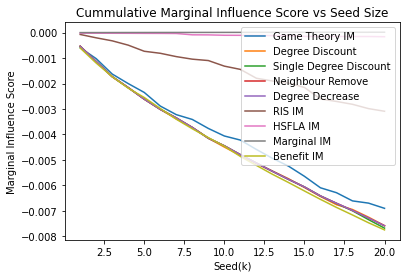

In [ ]:
plt.plot(k_array, cum_mi_list_game_theory, label = "Game Theory IM")
plt.plot(k_array, cum_mi_list_deg_discount, label = "Degree Discount")
plt.plot(k_array, cum_mi_list_sin_deg_discount, label = "Single Degree Discount")
plt.plot(k_array, cum_mi_list_neighbour_remove, label = "Neighbour Remove")
plt.plot(k_array, cum_mi_list_deg_decrease, label = "Degree Decrease")
plt.plot(k_array, cum_mi_list_RIS, label = "RIS IM")
plt.plot(k_array, cum_mi_list_HSFLA, label = "HSFLA IM")
plt.plot(k_array, cum_mi_list_MIM, label = "Marginal IM")
plt.plot(k_array, cum_mi_list_BIM, label = "Benefit IM")
plt.title('Cummulative Marginal Influence Score vs Seed Size')
plt.xlabel('Seed(k)')
plt.ylabel('Marginal Influence Score')
plt.legend(loc='upper right')

In [ ]:
trace1 = go.Scatter(
x = k_array,
y = exp(cum_mi_list_game_theory),
mode = 'lines',
name = 'Game Theory IM'
)
trace2 = go.Scatter(
x = k_array,
y = exp(cum_mi_list_deg_discount),
mode = 'lines',
name = 'Degree Discount'
)
trace3 = go.Scatter(
x = k_array,
y = exp(cum_mi_list_sin_deg_discount),
mode='lines',
name = 'Single Degre Discount'
)
trace4 = go.Scatter(
x = k_array,
y = exp(cum_mi_list_neighbour_remove),
mode='lines',
name = 'Neighbour Remove'
)
trace5 = go.Scatter(
x = k_array,
y = exp(cum_mi_list_deg_decrease),
mode='lines',
name = 'Degree Decrease'
)
trace6 = go.Scatter(
x = k_array,
y = exp(cum_mi_list_RIS),
mode='lines',
name = 'RIS IM'
)
trace7 = go.Scatter(
x = k_array,
y = exp(cum_mi_list_MIM),
mode='lines',
name = 'Marginal IM'
)
trace8 = go.Scatter(
x = k_array,
y = exp(cum_mi_list_BIM),
mode='lines',
name = 'Benefit IM'
)
trace9 = go.Scatter(
x = k_array,
y = exp(cum_mi_list_HSFLA),
mode='lines',
name = 'HSFLA IM'
)
layout = go.Layout(
title = "Cummulative Exponential Marginal Influence Score vs Seed Size",
xaxis = {'title' : "Seed(k)"},
yaxis = {'title' : "Marginal Influence Score"}
)
fig = go.Figure(data=[trace1, trace2, trace3,trace4,trace5,trace6,trace9, trace7,trace8], layout=layout)
fig.show()

Graph for Cummulative Exponential and Non Exponential Benefit Influence Score Vs Seed Size

In [ ]:
trace1 = go.Scatter(
x = k_array,
y = exp(benefit_list_game_theory),
mode = 'lines',
name = 'Game Theory IM'
)
trace2 = go.Scatter(
x = k_array,
y = exp(benefit_list_deg_discount),
mode = 'lines',
name = 'Degree Discount'
)
trace3 = go.Scatter(
x = k_array,
y = exp(benefit_list_sin_deg_discount),
mode='lines',
name = 'Single Degree Discount'
)
trace4 = go.Scatter(
x = k_array,
y = exp(benefit_list_neighbour_remove),
mode='lines',
name = 'Neighbour Remove'
)
trace5 = go.Scatter(
x = k_array,
y = exp(benefit_list_deg_decrease),
mode='lines',
name = 'Degree Decrease'
)
trace6 = go.Scatter(
x = k_array,
y = exp(benefit_list_RIS),
mode='lines',
name = 'RIS IM'
)
trace7 = go.Scatter(
x = k_array,
y = exp(benefit_list_MIM),
mode='lines',
name = 'Marginal IM'
)
trace8 = go.Scatter(
x = k_array,
y = exp(benefit_list_BIM),
mode='lines',
name = 'Benefit IM'
)
trace9 = go.Scatter(
x = k_array,
y = exp(benefit_list_HSFLA),
mode='lines',
name = 'HSFLA IM'
)
layout = go.Layout(
title = "Cummulative Exponential Benefit Influence Score vs Seed Size",
xaxis = {'title' : "Seed(k)"},
yaxis = {'title' : "Exponential Benefit Influence Score"}
)
fig = go.Figure(data=[trace1, trace2, trace3,trace4,trace5,trace6,trace9, trace7, trace8], layout=layout)
fig.show()

In [ ]:
trace1 = go.Scatter(
x = k_array,
y = (benefit_list_game_theory),
mode = 'lines',
name = 'Game Theory IM'
)
trace2 = go.Scatter(
x = k_array,
y = (benefit_list_deg_discount),
mode = 'lines',
name = 'Degree Discount'
)
trace3 = go.Scatter(
x = k_array,
y = (benefit_list_sin_deg_discount),
mode='lines',
name = 'Single Degree Discount'
)
trace4 = go.Scatter(
x = k_array,
y = (benefit_list_neighbour_remove),
mode='lines',
name = 'Neighbour Remove'
)
trace5 = go.Scatter(
x = k_array,
y = (benefit_list_deg_decrease),
mode='lines',
name = 'Degree Decrease'
)
trace6 = go.Scatter(
x = k_array,
y = (benefit_list_RIS),
mode='lines',
name = 'RIS IM'
)
trace7 = go.Scatter(
x = k_array,
y = (benefit_list_MIM),
mode='lines',
name = 'Marginal IM'
)
trace8 = go.Scatter(
x = k_array,
y = (benefit_list_BIM),
mode='lines',
name = 'Benefit IM'
)
trace9 = go.Scatter(
x = k_array,
y = (benefit_list_HSFLA),
mode='lines',
name = 'HSFLA IM'
)
layout = go.Layout(
title = "Cummulative Benefit Influence Score vs Seed Size",
xaxis = {'title' : "Seed(k)"},
yaxis = {'title' : "Benefit Influence Score"}
)
fig = go.Figure(data=[trace1, trace2, trace3,trace4,trace5,trace6,trace9,trace7,trace8], layout=layout)
fig.show()

Graph for Cummulative Exponential and Non Exponential Negative Influence Score Vs Seed Size

In [ ]:
trace1 = go.Scatter(
x = k_array,
y = exp(loss_list_game_theory),
mode = 'lines',
name = 'Game Theory IM'
)
trace2 = go.Scatter(
x = k_array,
y = exp(loss_list_deg_discount),
mode = 'lines',
name = 'Degree Discount'
)
trace3 = go.Scatter(
x = k_array,
y = exp(loss_list_sin_deg_discount),
mode='lines',
name = 'Single Degree Discount'
)
trace4 = go.Scatter(
x = k_array,
y = exp(loss_list_neighbour_remove),
mode='lines',
name = 'Neighbour Remove'
)
trace5 = go.Scatter(
x = k_array,
y = exp(loss_list_deg_decrease),
mode='lines',
name = 'Degree Decrease'
)
trace6 = go.Scatter(
x = k_array,
y = exp(loss_list_RIS),
mode='lines',
name = 'RIS IM'
)
trace7 = go.Scatter(
x = k_array,
y = exp(loss_list_MIM),
mode='lines',
name = 'Marginal IM'
)
trace8 = go.Scatter(
x = k_array,
y = exp(loss_list_BIM),
mode='lines',
name = 'Benefit IM'
)
trace9 = go.Scatter(
x = k_array,
y = exp(loss_list_HSFLA),
mode='lines',
name = 'HSFLA IM'
)
layout = go.Layout(
title = "Cummulative Exponential Negative Influence Score vs Seed Size",
xaxis = {'title' : "Seed(k)"},
yaxis = {'title' : "Exponential Negative Influence Score"}
)
fig = go.Figure(data=[trace1, trace2, trace3,trace4,trace5,trace6,trace9,trace7,trace8], layout=layout)
fig.show()

In [ ]:
trace1 = go.Scatter(
x = k_array,
y = (loss_list_game_theory),
mode = 'lines',
name = 'Game Theory IM'
)
trace2 = go.Scatter(
x = k_array,
y = (loss_list_deg_discount),
mode = 'lines',
name = 'Degree Discount'
)
trace3 = go.Scatter(
x = k_array,
y = (loss_list_sin_deg_discount),
mode='lines',
name = 'Single Degree Discount'
)
trace4 = go.Scatter(
x = k_array,
y = (loss_list_neighbour_remove),
mode='lines',
name = 'Neighbour Remove'
)
trace5 = go.Scatter(
x = k_array,
y = (loss_list_deg_decrease),
mode='lines',
name = 'Degree Decrease'
)
trace6 = go.Scatter(
x = k_array,
y = (loss_list_RIS),
mode='lines',
name = 'RIS IM'
)
trace7 = go.Scatter(
x = k_array,
y = (loss_list_MIM),
mode='lines',
name = 'Marginal IM'
)
trace8 = go.Scatter(
x = k_array,
y = (loss_list_BIM),
mode='lines',
name = 'Benefit IM'
)
trace9 = go.Scatter(
x = k_array,
y = (loss_list_HSFLA),
mode='lines',
name = 'HSFLA IM'
)
layout = go.Layout(
title = "Cummulative Negative Influence Score vs Seed Size",
xaxis = {'title' : "Seed(k)"},
yaxis = {'title' : "Negative Influence Score"}
)
fig = go.Figure(data=[trace1, trace2, trace3,trace4,trace5,trace6,trace9,trace7,trace8], layout=layout)
fig.show()

Bar Chart showing timings of various approaches with our approach

In [ ]:
import plotly.express as px
fig = px.bar(x=['Game Theory IM', 'Degree Discount', 'Single Degree Discount', 
           'Neighbor Remove', 'Degree Decrease', 'RIS IM', 'HSFLA IM', 'Marginal/Benefit IM'],
        y=[134.0, 1.18, 2.29, 5.396, 5.100, 122.3239, 1000, 10.888],
        title="Running time of algorithms on Facebook Dataset")
fig.update_xaxes(type='category')
fig.show()


Calculating the sum of marginal scores for the nodes obtained by our algo and IM algo


In [ ]:
tot_ms = 0
tot_im = 0
for i in imlist:
  tot_im = tot_im + marginal_score[i] 
for i in top_marginal_nodes:
  tot_ms = tot_ms + marginal_score[i]

In [ ]:
print(tot_im)
print(tot_ms)

-0.006905442951745517
1.5789892344161088e-05


In [ ]:
thresh = 0.5
matching_nodes = []
for node in test_G.nodes():
  if test_G.nodes[node]['Matching Score'] > thresh:
    matching_nodes.append(node)

In [ ]:
matching_nodes.sort()
print(len(matching_nodes))

393


In [ ]:
## Find all subsets of the matching set
##def recur(index,matching_nodes,subset,subset_list):
##  print(index)
##  if index == len(matching_nodes):
##    subset_list.append(subset)
##    return
##  subset.append(matching_nodes[index])
##  new_index = index+1
##  recur(new_index,matching_nodes,subset,subset_list)
##  subset.pop()
##  recur(new_index,matching_nodes,subset,subset_list)

Algo 1 --> Compute BL Score
Returns Node  having highest B-L Score from the social Network


In [ ]:
def computeBLScore(G2, alpha = opt_alpha, beta = opt_beta, lamda = opt_lambda, query = 1):
  temp_G = G2.copy()
  error = 1
  threshold = 10 ** (-10)
  k=0;
  V = G.number_of_nodes()
  E = G.number_of_edges()
  benefit2 = [[] for _ in range(V)]
  loss2 = [[] for _ in range(V)]
  for i in range(V):
    benefit2[i].append(0)
    loss2[i].append(0)
  while error > threshold:
    k+=1;
    for node in temp_G.nodes():
      benefit2[node].append(0)
      loss2[node].append(0);
      neighbour_list = list(temp_G.neighbors(node))
      for neighbour in neighbour_list:
        benefit2[node][k] += (temp_G[node][neighbour]['weight'])*(1-lamda)*(alpha*benefit2[neighbour][k-1] + (1-alpha)*temp_G.nodes[neighbour]['Matching Score'])/E
        loss2[node][k] += (temp_G[node][neighbour]['weight'])*(beta*loss2[neighbour][k-1] + (1-beta)*(1-temp_G.nodes[neighbour]['Matching Score']))/E
  ## query node 
    benefit2[query][k] += lamda/V;
    error = 0;
    for i in temp_G.nodes():
      error += ((benefit2[i][k]-benefit2[i][k-1])**2 + (loss2[i][k]-loss2[i][k-1])**2)
    error = error ** 0.5
  best_ms = -1
  best_marginal_node = -1
  for node in temp_G.nodes():
    ms = benefit2[node][k] - loss2[node][k]
    if ms > best_ms and node!= query:
      best_ms = ms
      best_marginal_node = node

  return best_marginal_node;


In [ ]:
G2 = G.copy()

In [ ]:
G2.nodes[1]

{'Matching Score': 0.21,
 'facebook_id': 191483281412,
 'id': 1,
 'page_name': 'U.S. Consulate General Mumbai',
 'page_type': 'government'}

In [ ]:
# G2.remove_node(1)

In [ ]:
G.nodes[1]

{'Matching Score': 0.21,
 'facebook_id': 191483281412,
 'id': 1,
 'page_name': 'U.S. Consulate General Mumbai',
 'page_type': 'government'}

In [ ]:
alpha_list = [opt_alpha_uniform, opt_alpha_normal, 0.85, 0.01]
beta_list = [opt_beta_uniform, opt_beta_normal, 0.85, 0.01]

In [ ]:
def MSI(opt_alpha = opt_alpha, opt_beta = opt_beta, opt_lambda = opt_lambda, budget = 5):
  msi_list = []
  for i in range(1, budget+1):
    x = computeBLScore(G2,opt_alpha,opt_beta,opt_lambda)
    neighbour_list = list(G2.neighbors(x))
    for y in neighbour_list:
      if G2.has_edge(y,x):
        G2.remove_edge(y,x)
      if G2.has_edge(x,y):
        G2.remove_edge(x,y)
    G2.remove_node(x)
    print(x)
    msi_list.append(x)
  return msi_list


In [ ]:
opt_alpha,opt_beta,opt_lambda

(0.9031890667500229, 0.9598532369743946, 0.235)

In [ ]:
msi_list = []
msi_list  = MSI()

16846
10440
18079
325
9419


In [ ]:
msilist = [16846,10440,18079,325,9419]
for node in msilist:
  print(G.nodes[node]['page_name']) 

Ministry of Information & Broadcasting, Government of India
Harish Rawat
PIB Kolkata
Press Information Bureau - PIB,  Government of India
Hennepin County Government


In [ ]:
print(G.nodes[16846]) 

{}


In [ ]:
# msi_with_opt_lambda = []
# msi_without_lambda = []

In [ ]:
# for alpha,beta in zip(alpha_list,beta_list):
#   msi_without_lambda.append(MSI(alpha,beta))
#   msi_with_opt_lambda.append(MSI(alpha,beta,opt_lambda=opt_lambda))

In [ ]:
# categories = ['Uniform', 'Normal', '0.85', '0.01']

Msi nodes considering Normal Distribution


In [ ]:
# k=0
# print("While choosinng lambda as", opt_lambda)
# for msi_list in msi_with_opt_lambda:
#   print("In category", categories[k])
#   for node in msi_list:
#     print(G.nodes[node]['page_name'])
#   k=k+1

While choosinng lambda as 0.235
In category Uniform
Clerk & Comptroller, Palm Beach County
City of Longmont, Colorado Government
Department of Personnel and Training (DoPT), Government of India
Alderman Van Johnson
City of Sandy, Oregon – City Government
In category Normal
NASA - National Aeronautics and Space Administration
United States Air Force
U.S. Navy
Army Sustainment
CDC
In category 0.85
HMRC
Weld County Government
STPI
City of Westwood Kansas - Government
Ferguson Township Police, Pennsylvania
In category 0.01
Ministry of Food Processing Industries, Government of India
Department of Agriculture and Water Resources Graduates
Dr. Mahesh Sharma
Vol Network- IMG
Tampa Parks & Recreation


In [ ]:
# k=0
# print("While choosinng lambda as", 0.5)
# for msi_list in msi_without_lambda:
#   print("In category", categories[k])
#   for node in msi_list:
#     print(G.nodes[node]['page_name'])
#   k=k+1

While choosinng lambda as 0.5
In category Uniform
City of Foster City, CA - Government
GovTech Careers
Swachh Bharat Mission - Urban
India in Libya (Embassy of India, Tripoli)
India in Ivory Coast (Embassy of India, Abidjan)
In category Normal
Facebook
Barack Obama
Los Angeles District, U.S. Army Corps of Engineers
U.S. Department of State
European Commission
In category 0.85
India in Switzerland (Embassy of India, Berne)
Jayant Sinha
SFO Museum
Ministry of New and Renewable Energy (MNRE), Government of India
National Film Archive of India
In category 0.01
Councilman Stavros S. Anthony
FOI Philippines
Ministry of Minority Affairs, Government of India
Ministry of Coal,Government of India
Ministry of Power, Government of India


MSI nodes considering Requisite Distribution


In [ ]:
for node in msi_list:
  print(G.nodes[node]['page_name'])

Ministry of Information & Broadcasting, Government of India
Harish Rawat
PIB Kolkata
Press Information Bureau - PIB,  Government of India
Hennepin County Government


In [ ]:
G3 = G2.copy()

In [ ]:
G_mti = G.copy()
print(nx.is_connected(G_mti))

True


In [ ]:
budget = 5
mti_list = []
l = []

In [ ]:
a = [1,2,3]
#remove first element
x = a.pop(0)
a

[2, 3]

In [ ]:
x

1

In [ ]:
nx.is_directed(G_mti)

False

In [ ]:
for i in range(1, budget+1):
  x = computeBLScore(G_mti,opt_alpha,opt_beta,opt_lambda)
  mti_list.append(x)
  l.append(x)
  while len(l)>0:
    y = l[0]
    neighbour_list = list(G_mti.neighbors(y))   
    for z in neighbour_list:
      Mz = G_mti.nodes[z]['Matching Score']
      if Mz <= 0.4:
        continue
      test_set = set(l)
      if z not in test_set:
        l.append(z)
      if G_mti.has_edge(y,z):
        G_mti.remove_edge(y,z)
      if G_mti.has_edge(z,y):
        G_mti.remove_edge(z,y)
    G_mti.remove_node(y)
    l.pop(0)
      # if G_mti.has_edge(z,y):
      #   l.append(z)
      #   G_mti.remove_edge(z,y)
    # G_mti.remove_node(y)

In [ ]:
mti_list

[16846, 10440, 9419, 12289, 6299]

In [ ]:
mtilist = [16846, 10440, 9419, 12289, 6299]
for node in mtilist:
  print(G.nodes[node]['page_name']) 

Ministry of Information & Broadcasting, Government of India
Harish Rawat
Hennepin County Government
City of Overland Park, KS Government
Lcdot - Lake County, IL Division of Transportation


In [ ]:
mi_nodes_result = []
top_k_mi_nodes = []
threshold = 1
for nodes in G.nodes():
  if G.nodes[nodes]['Matching Score'] >= threshold:
    mi_nodes_result.append(nodes)
top_k_mi_nodes = random.sample(mi_nodes_result, 5)
for node in top_k_mi_nodes:
  print(G.nodes[node]['page_name'])

City of Worthington Government
Ministry of Human Resource Development, Government of India
Austin, Texas - Your City Government
Town of Smyrna, TN - Local Government
World Government Summit - القمة العالمية للحكومات


In [ ]:
for node in mti_list:
  print(G.nodes[node]['page_name'])
  print(G.nodes[node]['page_type'])

Ministry of Information & Broadcasting, Government of India
government
Harish Rawat
politician
Hennepin County Government
government
City of Overland Park, KS Government
government
Lcdot - Lake County, IL Division of Transportation
government


**Color Code**
1.   Yellow : MSI and MTI
2.   Red: MSI
3.   Green : MTI
4.   Blue: Neither 

In [ ]:
for node in G.nodes():
  if node in msi_list and node in mti_list:
    G.nodes[node]['colour'] = 'yellow'
  elif node in msi_list:
    G.nodes[node]['colour'] = 'red'
  elif node in mti_list:
    G.nodes[node]['colour'] = 'green'
  else:
    G.nodes[node]['colour'] = 'blue'

In [ ]:
nx.write_gexf(G, "Facebook.gexf")

In [ ]:
msi_list

[16846, 10440, 18079, 325, 9419]

In [ ]:
G.nodes[20327]

{'Matching Score': 0.77,
 'facebook_id': 30994589663,
 'id': 20327,
 'page_name': 'City of Arvada Government',
 'page_type': 'government'}

In [ ]:
G.nodes[13927]